# Carregando os dados do csv

In [55]:
import numpy as np
import pandas as pd
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from time import time
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn import datasets, linear_model
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.decomposition import PCA, NMF
from sklearn.feature_selection import SelectKBest, chi2, f_regression,mutual_info_regression


sns.set(style="whitegrid", color_codes=True)


%matplotlib inline

try:
    data = pd.read_csv("survey_results_public.csv")
    print "O dataset da pesquisa contém {} linhas com {} caracteristicas cada.".format(*data.shape)
except:
    print "Dataset não encontrado, aquirvo CSV está na pasta?"

O dataset da pesquisa contém 51392 linhas com 154 caracteristicas cada.


# Pegando dados do EUA que trabalham full time e ganham em dolares

In [56]:
dataFinal = data[(data["Country"] == "United States") & (data["EmploymentStatus"] == "Employed full-time") & (data["Currency"] == "U.S. dollars ($)")] 
salaryDf = pd.DataFrame(dataFinal["Salary"])

print "Descrição de todos os salary"
display(salaryDf.describe())

q = dataFinal["Salary"].quantile(0.95)
qm = dataFinal["Salary"].quantile(0.05)


print "Descrição dos salays sem os outliers"
display(salaryDf[(salaryDf["Salary"] < q) & (salaryDf["Salary"] > qm)].describe())

#Colocando no dataset os dados sem outliers
dataFinal = dataFinal[(dataFinal["Salary"] < q) & (dataFinal["Salary"] > qm)]

Descrição de todos os salary


Salary
count    3719.000000
mean    97083.681904
std     34246.971246
min         5.000000
25%     71000.000000
50%     95000.000000
75%    120000.000000
max    197000.000000

Descrição dos salays sem os outliers


Salary
count    3343.000000
mean    96491.234520
std     27570.244612
min     47800.000000
25%     74000.000000
50%     95000.000000
75%    118000.000000
max    158100.000000

In [57]:
#Pegando todas as features e colocando elas em 3 grupos, as que tem multiplas respostas, respostas simples ou são respostas númericas
features_multiples = ["DeveloperType", "HaveWorkedLanguage", "HaveWorkedDatabase", "HaveWorkedPlatform", "Race", "MetricAssess", "IDE", "Methodology"]
features_normal = ["FormalEducation", "MajorUndergrad", "University", "YearsProgram", "CompanySize", "YearsCodedJob", "Professional", "ProgramHobby", "HomeRemote", "CompanyType", "PronounceGIF", "ProblemSolving", "BuildingThings", "LearningNewTech", "BoringDetails", "JobSecurity", "DiversityImportant", "AnnoyingUI", "FriendsDevelopers", "RightWrongWay", "UnderstandComputers", "SeriousWork", "InvestTimeTools", "WorkPayCare", "KinshipDevelopers", "ChallengeMyself", "CompetePeers", "ChangeWorld", "AuditoryEnvironment", "VersionControl", "CheckInCode", "ShipIt", "OtherPeoplesCode", "EnjoyDebugging", "InTheZone", "DifficultCommunication", "CollaborateRemote", "InfluenceInternet", "InfluenceWorkstation", "InfluenceHardware", "InfluenceServers", "InfluenceTechStack", "InfluenceDeptTech", "InfluenceVizTools", "InfluenceDatabase", "InfluenceCloud", "InfluenceConsultants", "InfluenceRecruitment", "InfluenceCommunication", "Gender", "HighestEducationParents", "SurveyLong"]
features_int = ["CareerSatisfaction", "JobSatisfaction", "HoursPerWeek"]

In [58]:
%pylab inline
pylab.rcParams['figure.figsize'] = (11, 6)





Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['test']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# Perguntas x Salario

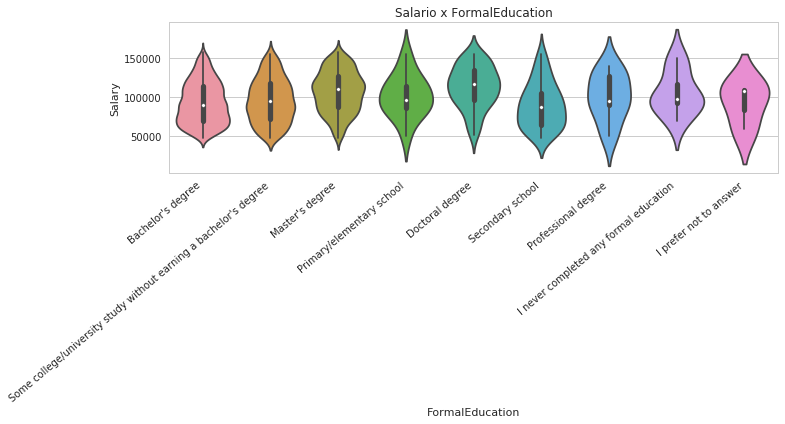

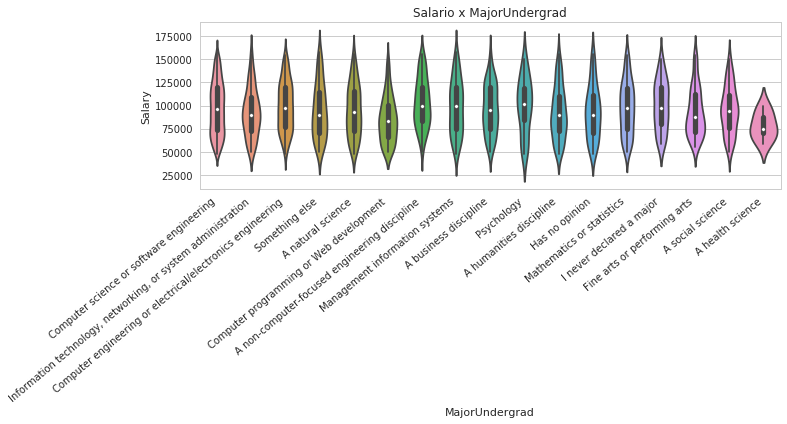

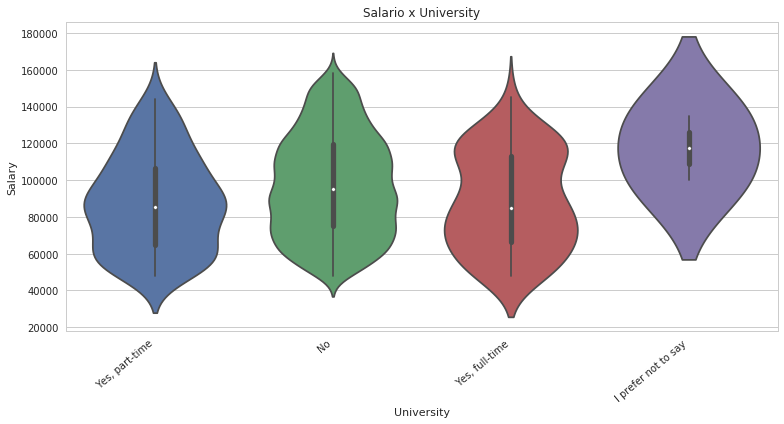

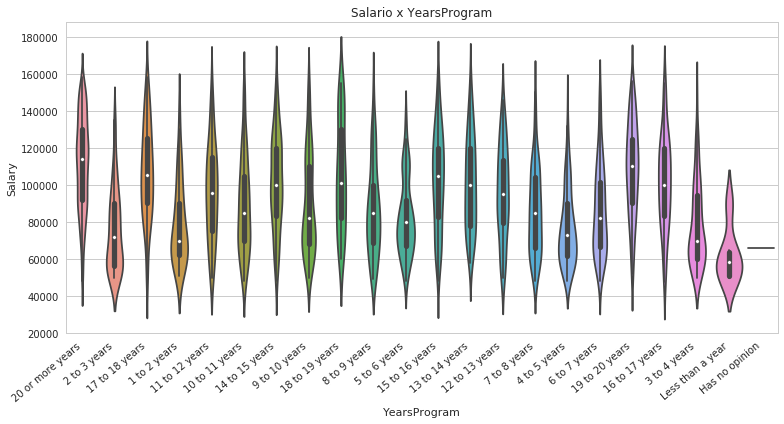

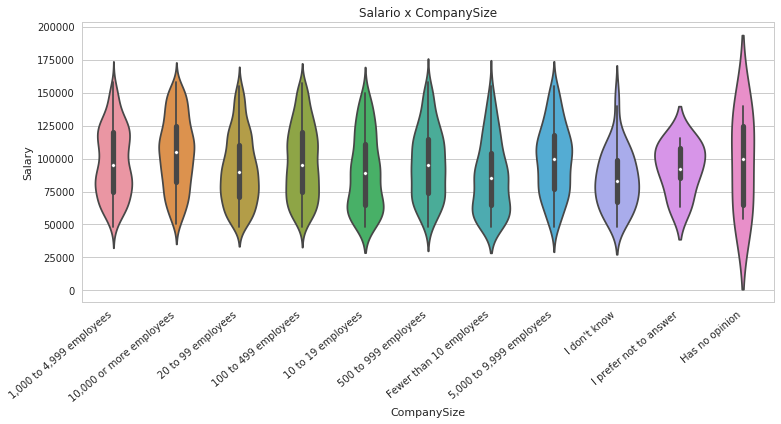

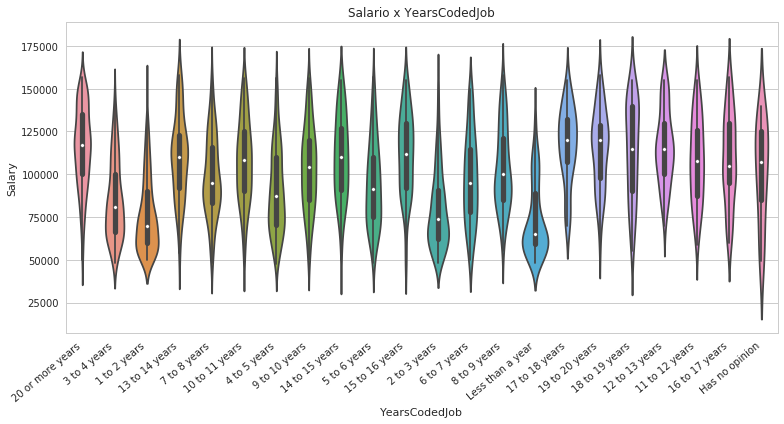

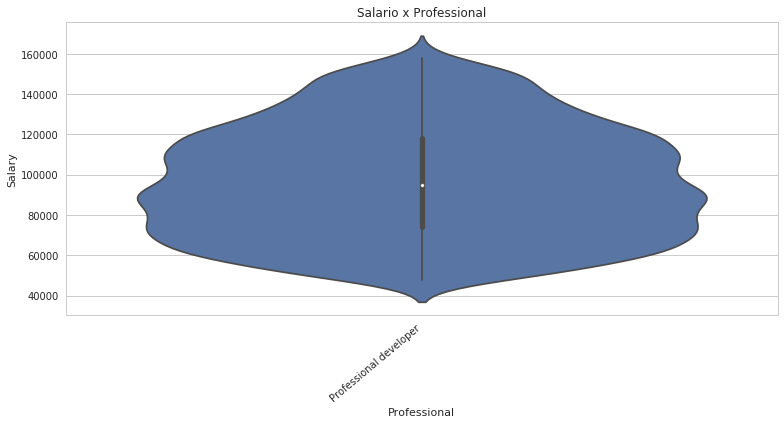

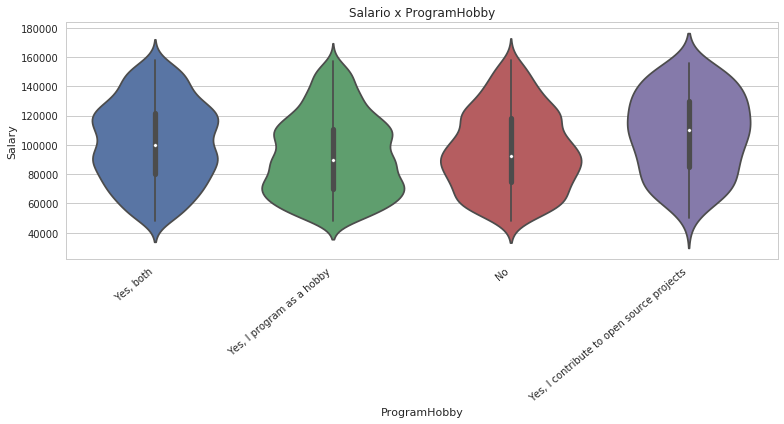

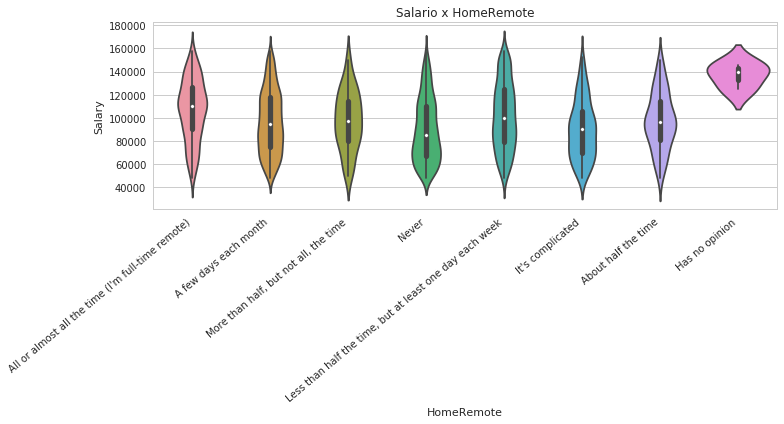

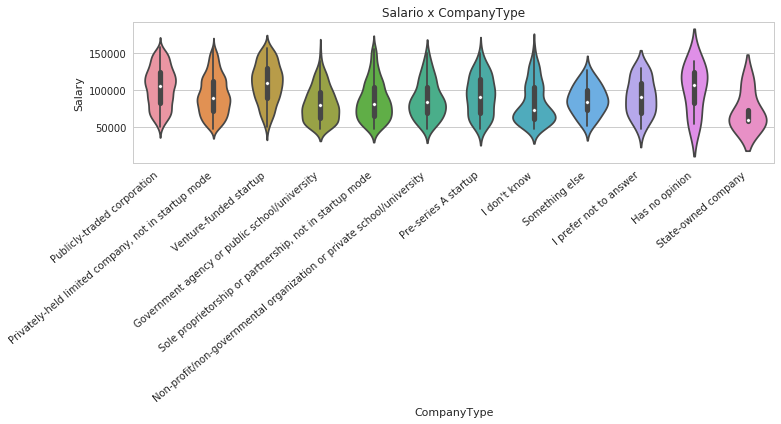

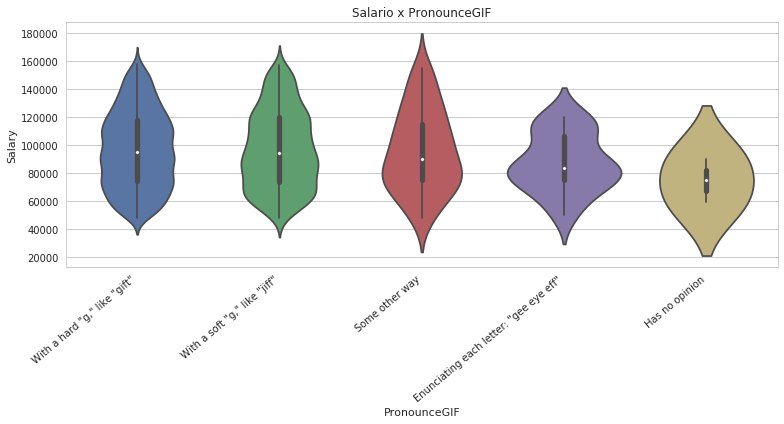

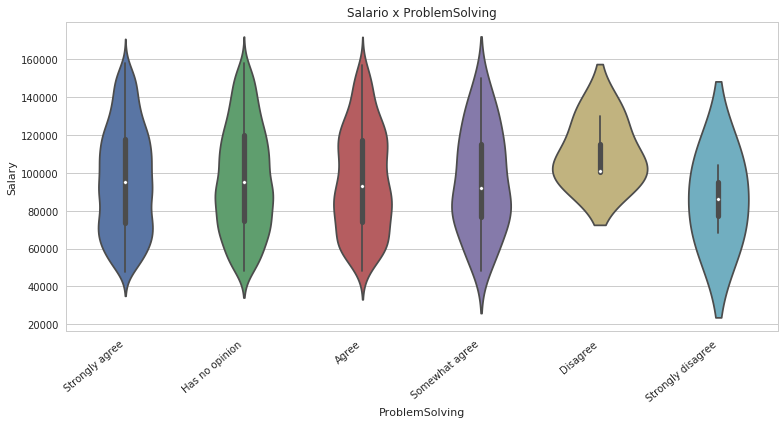

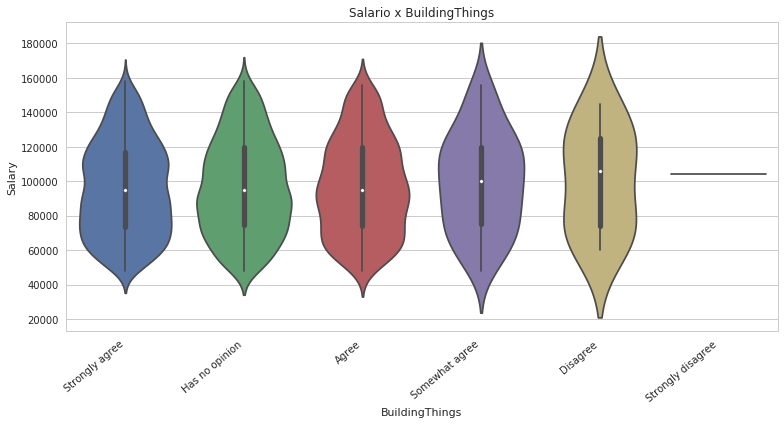

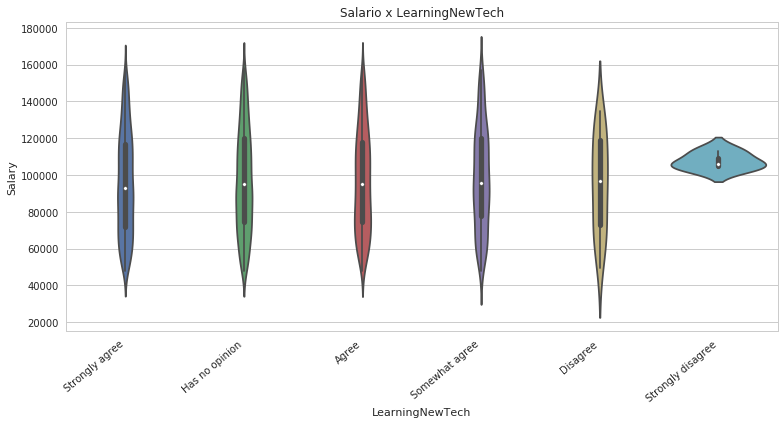

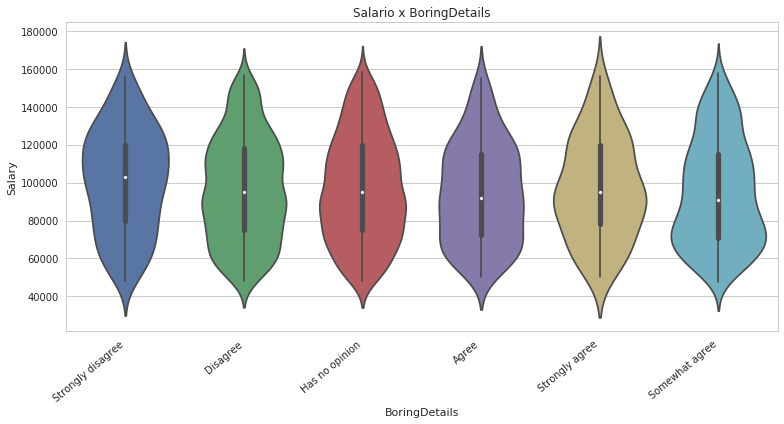

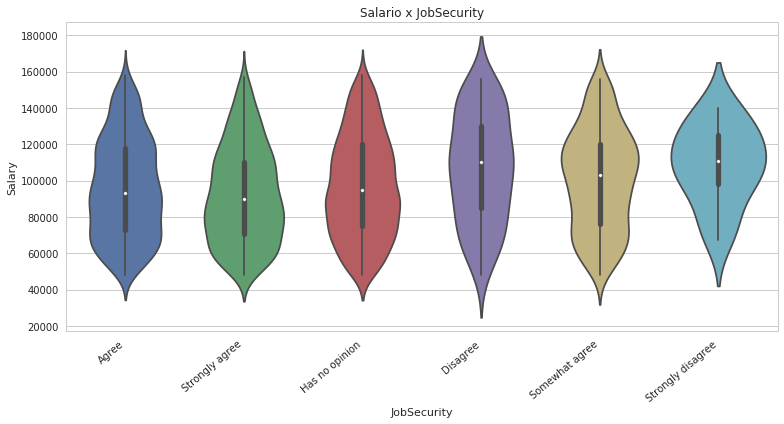

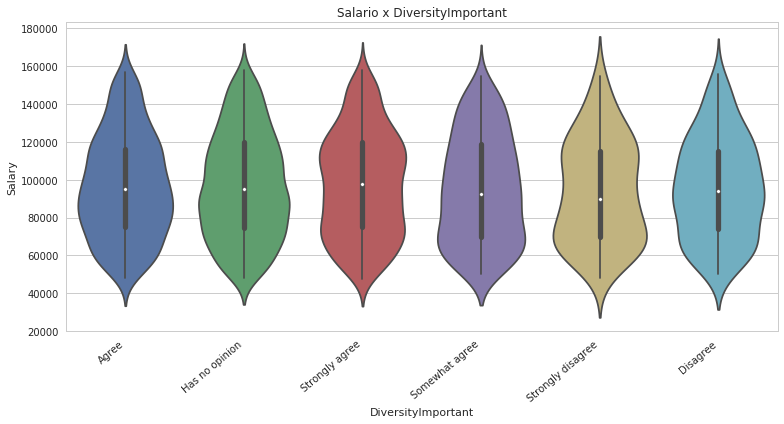

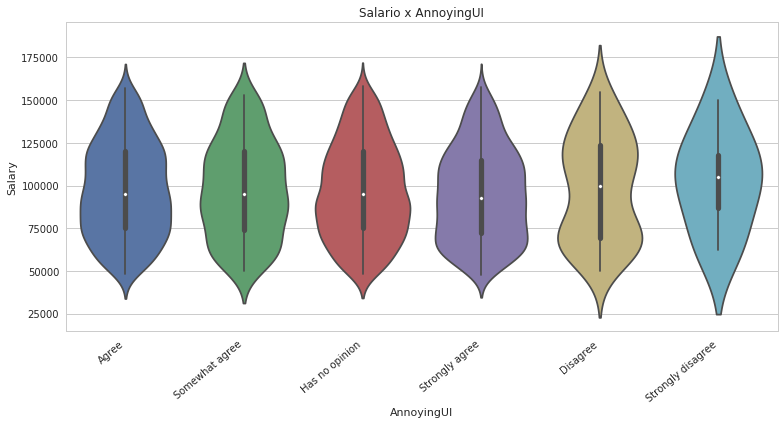

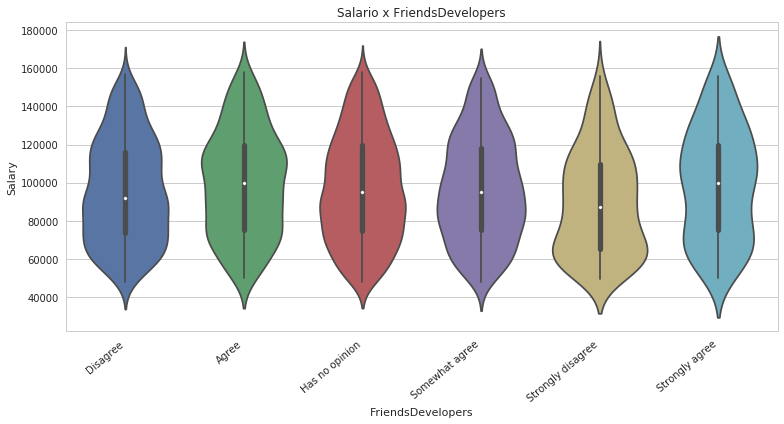

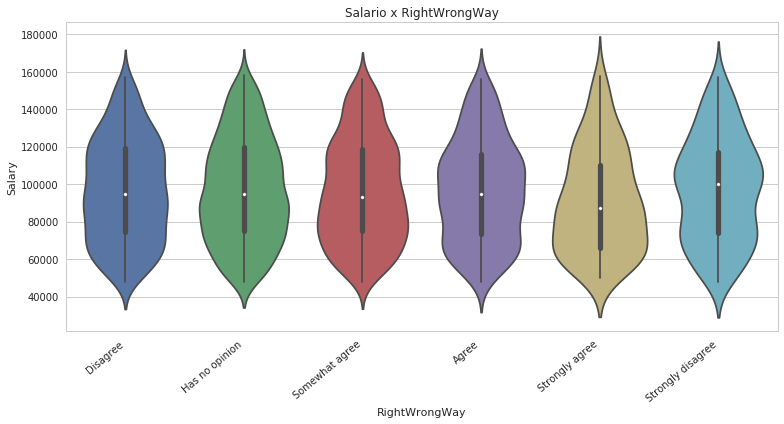

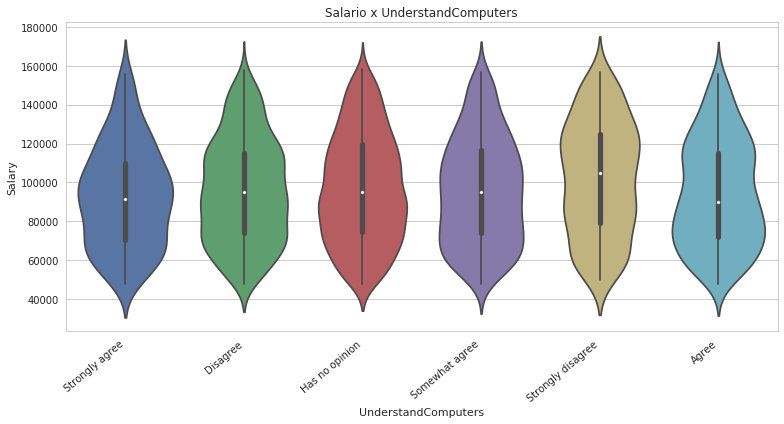

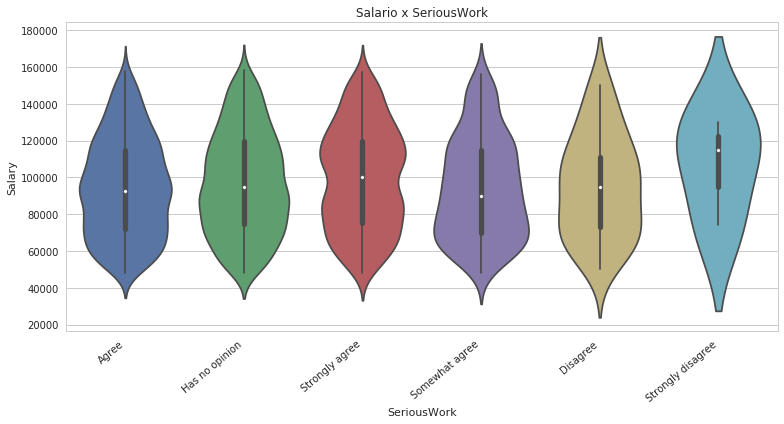

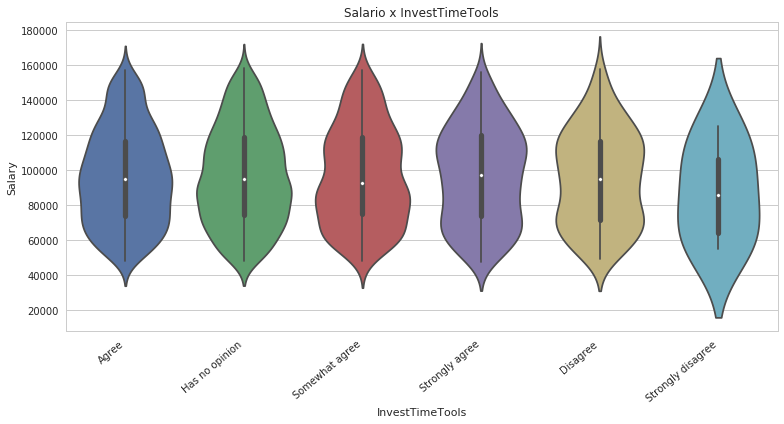

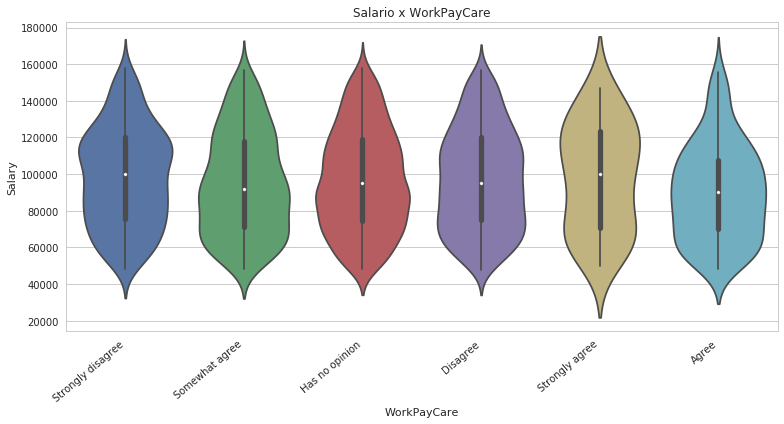

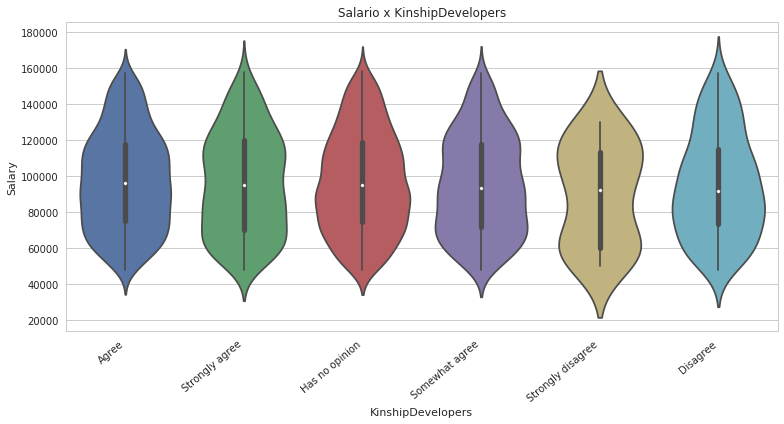

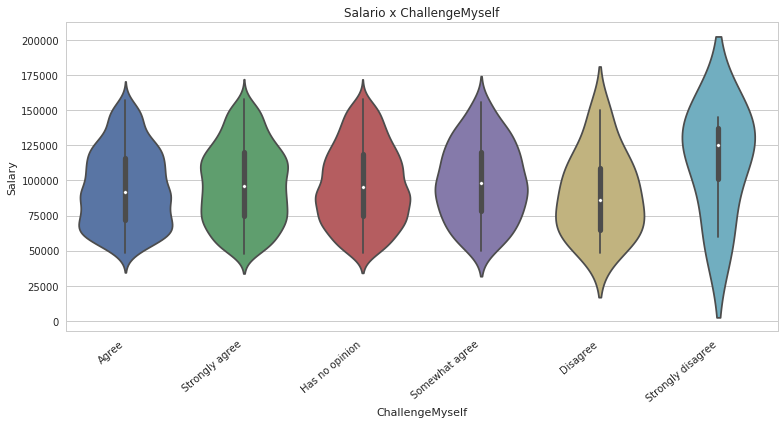

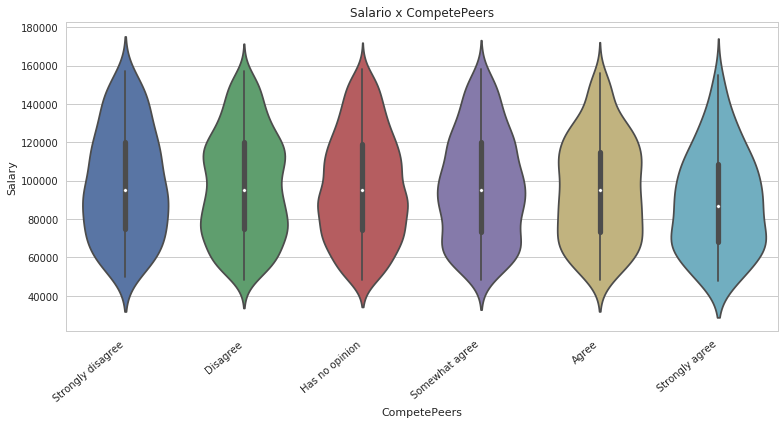

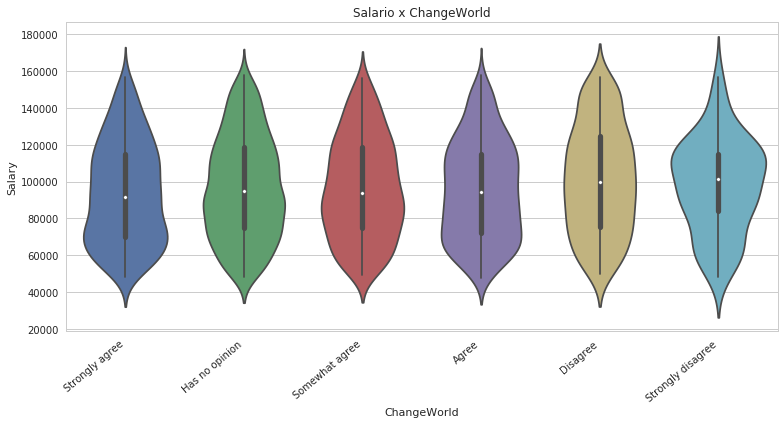

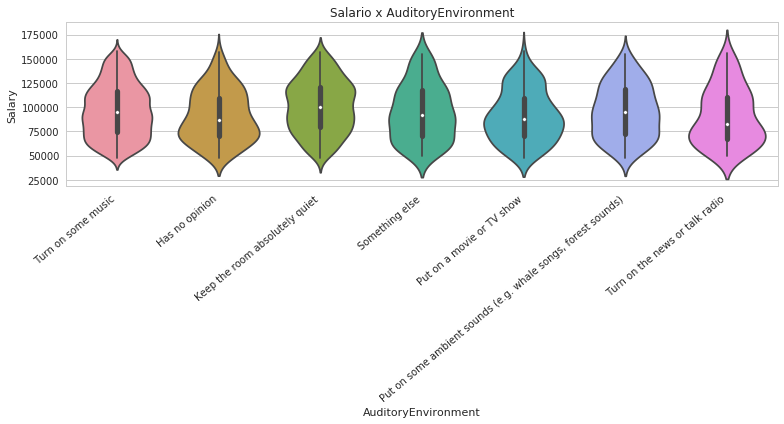

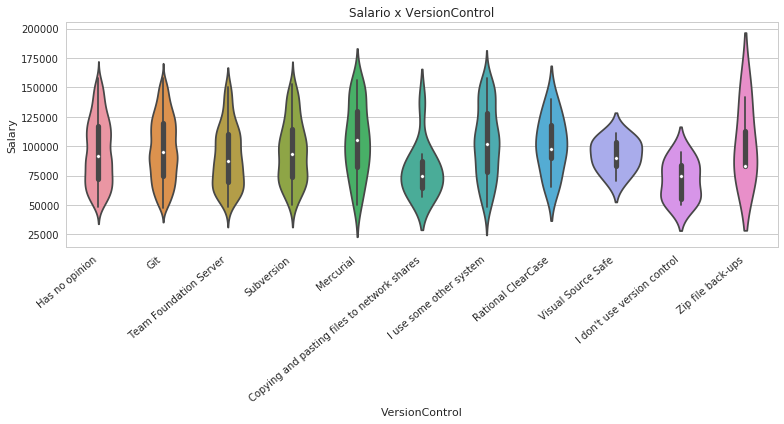

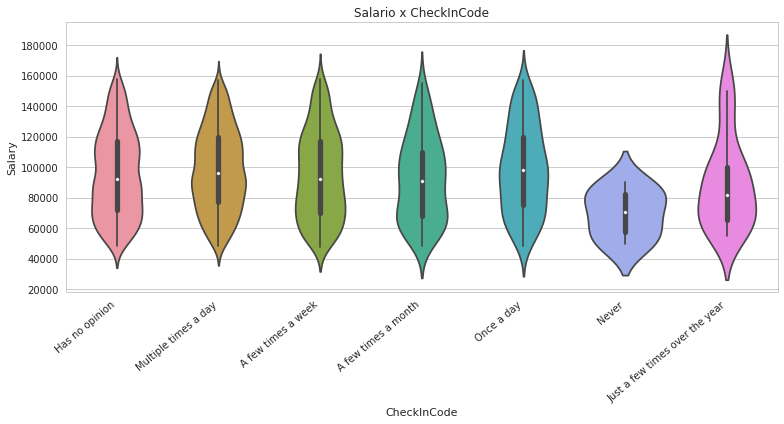

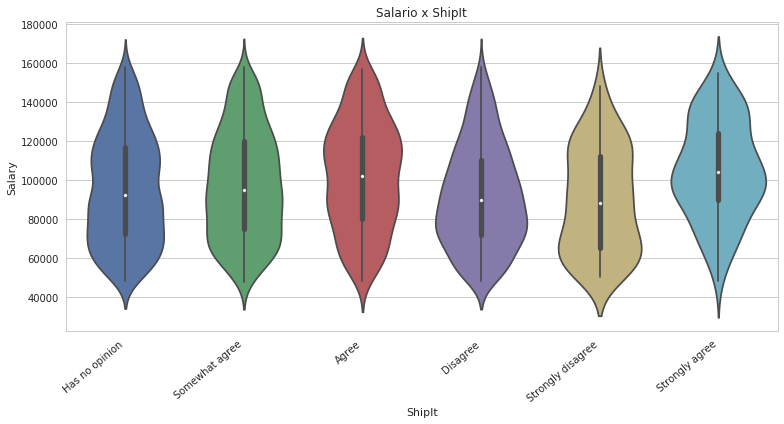

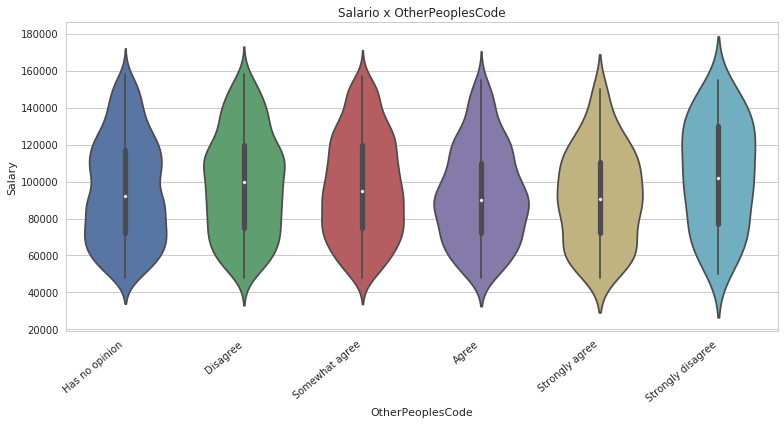

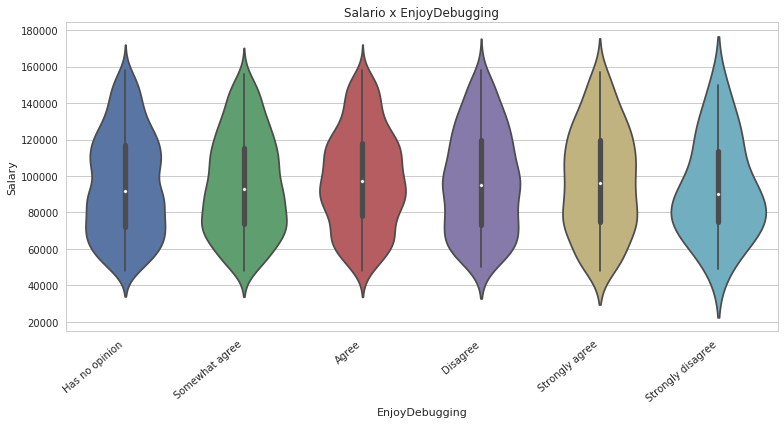

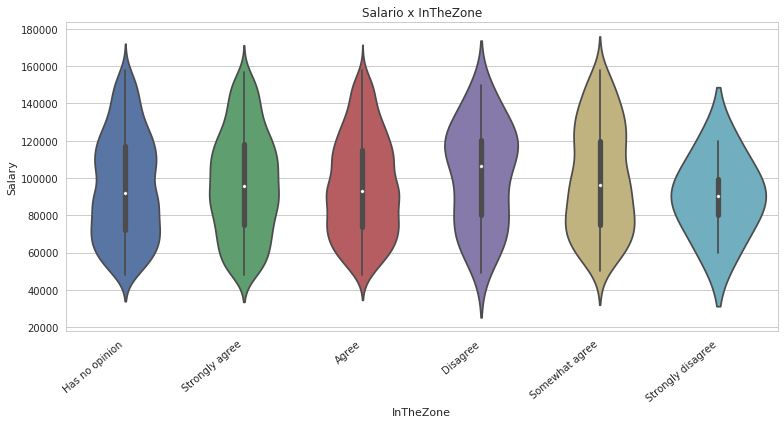

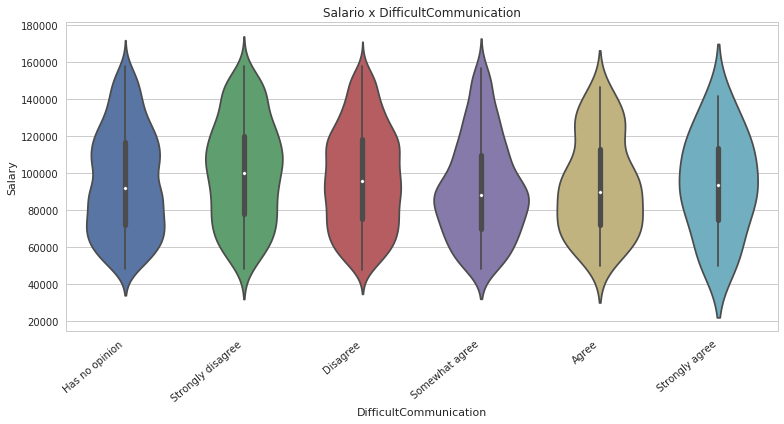

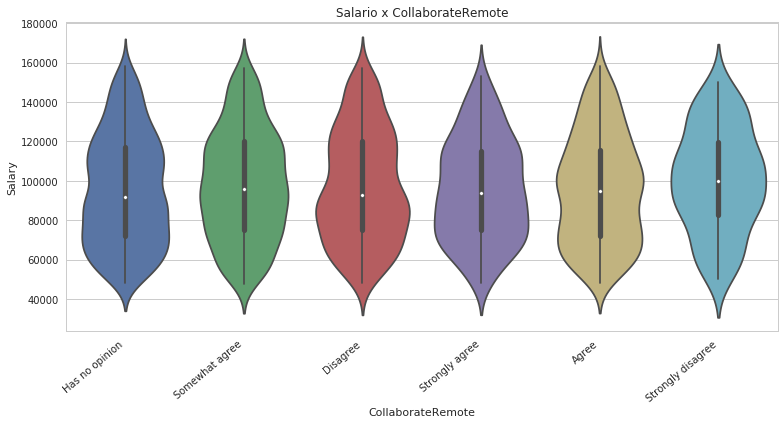

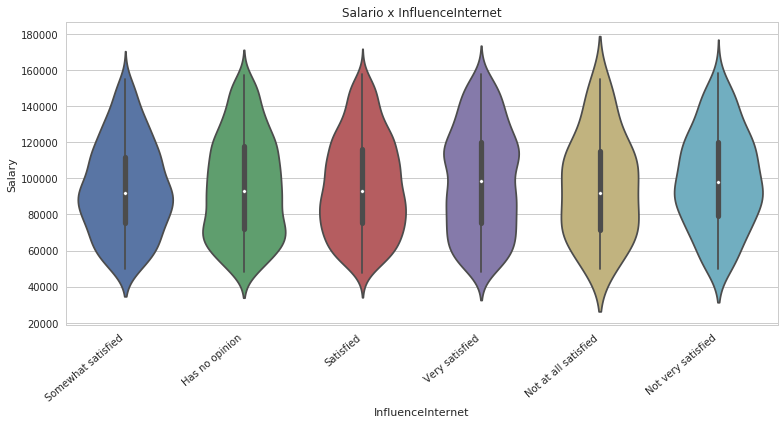

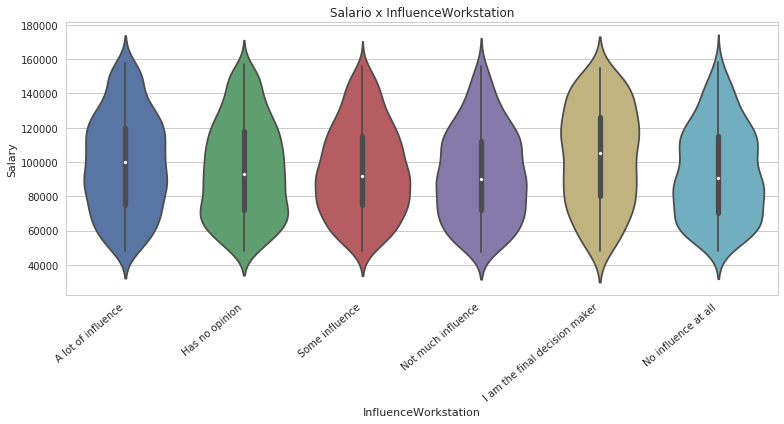

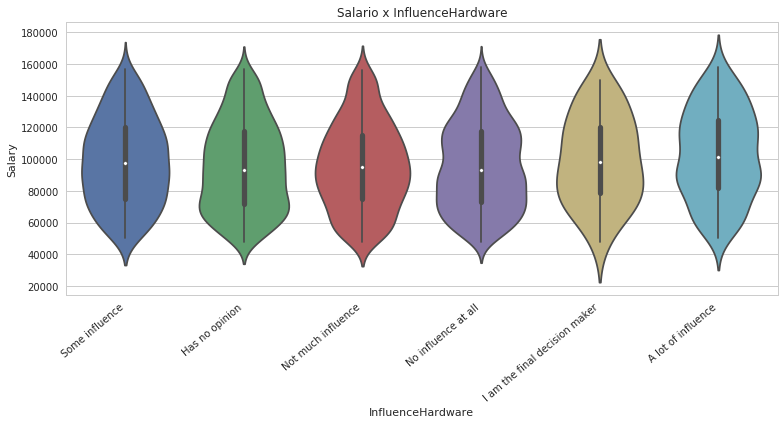

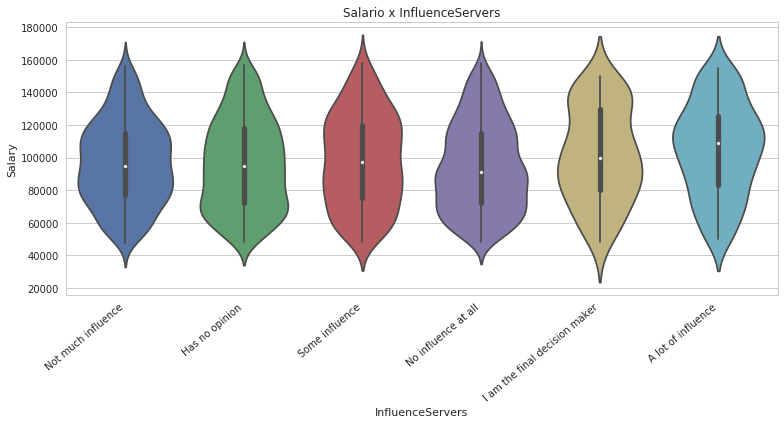

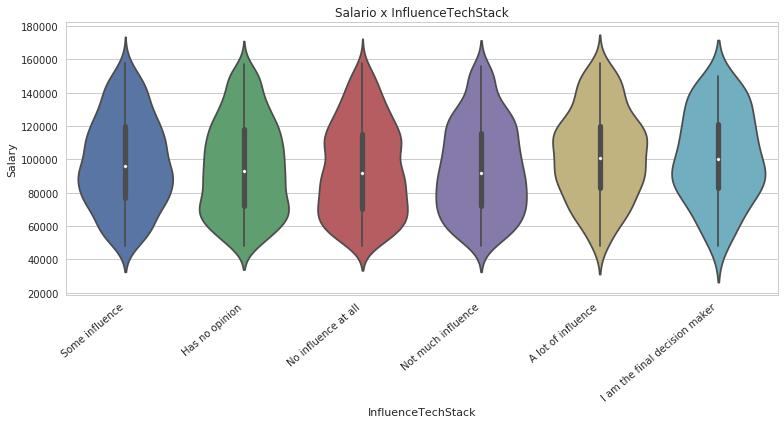

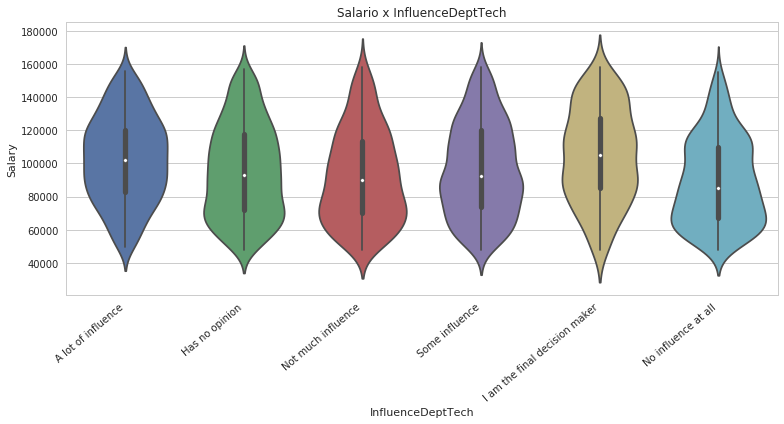

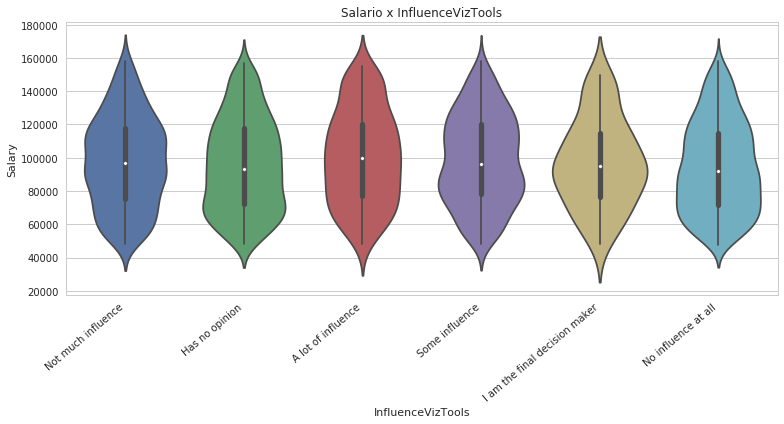

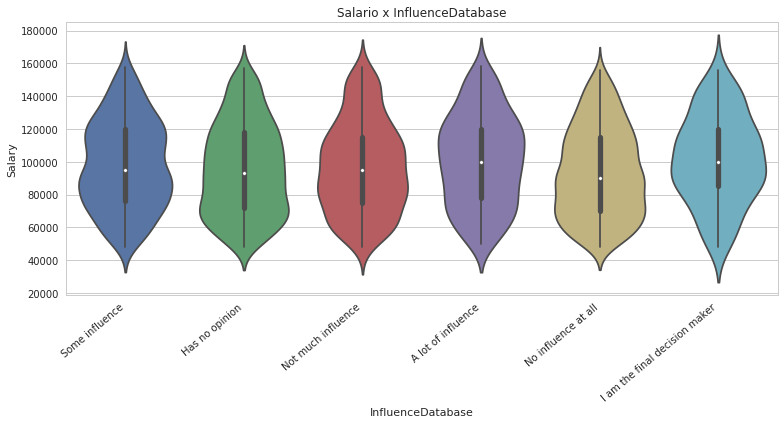

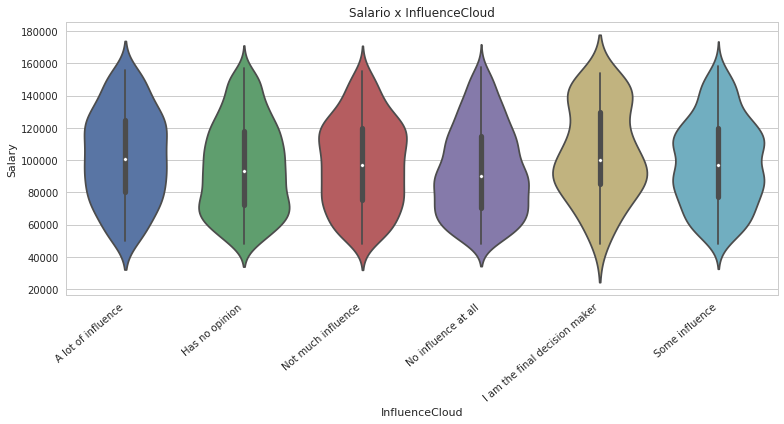

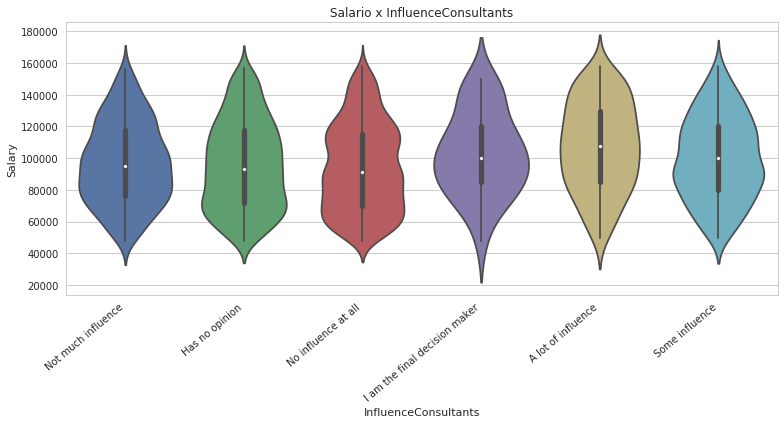

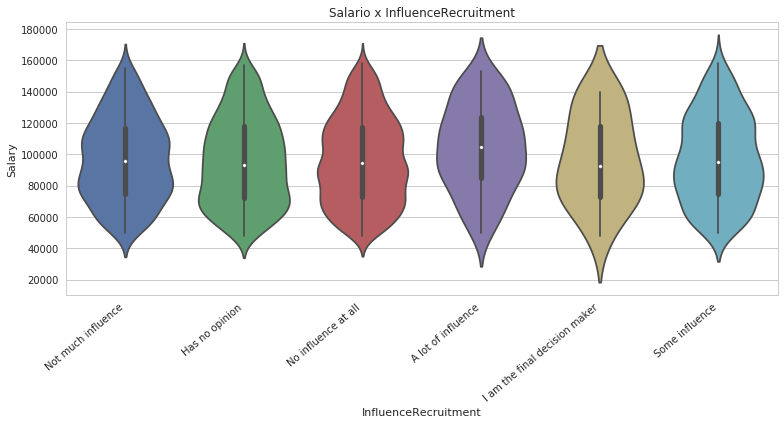

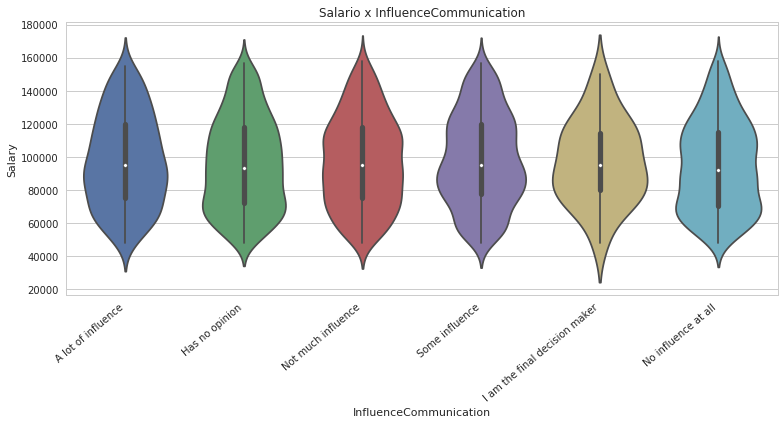

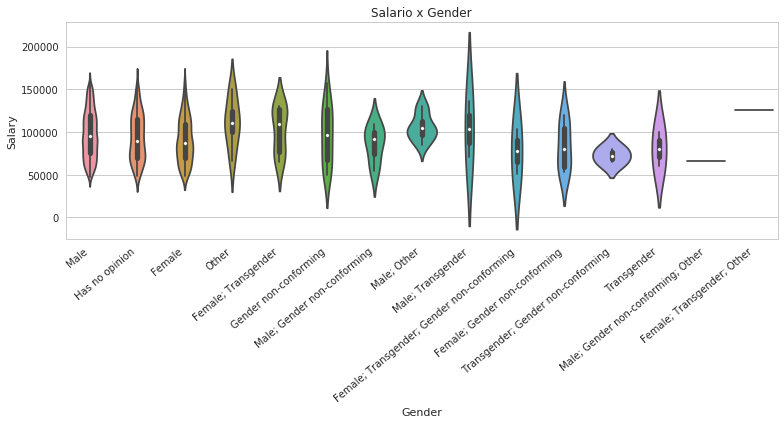

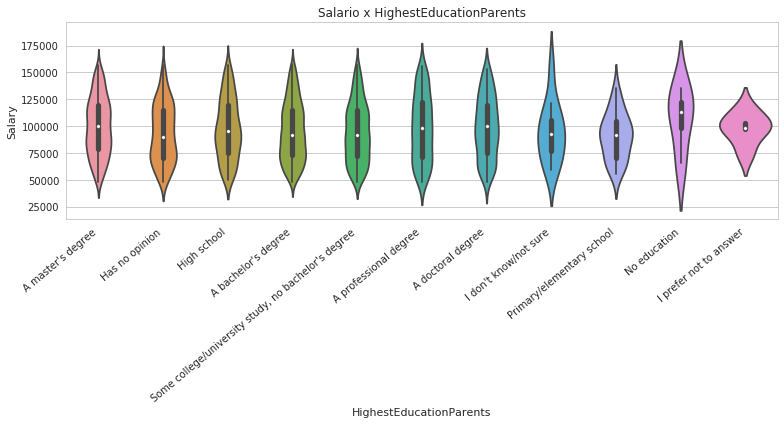

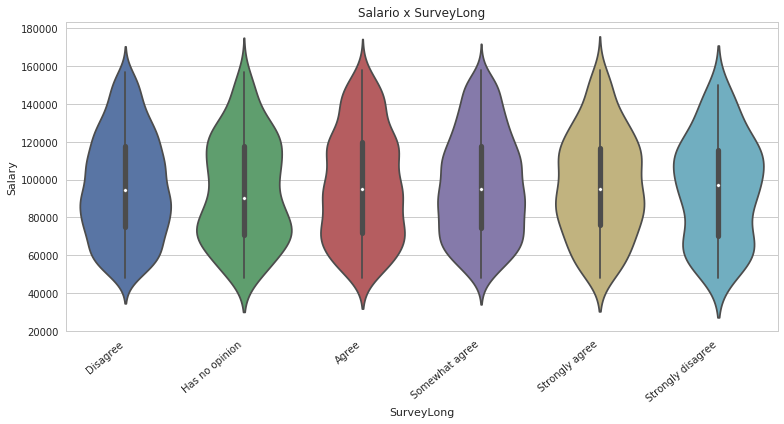

In [15]:
#Analises

for i, columnChart in enumerate(features_normal):
    try:
        #print columnChart
        plt.figure(i)
        chart = sns.violinplot(x=columnChart, y="Salary", data=dataFinal)
        chart.set_xticklabels(chart.get_xticklabels(), rotation=40, ha="right")
        plt.title("Salario x {}".format(columnChart))
        plt.tight_layout()
        plt.show()
    except UnicodeDecodeError:
        print columnChart


# Distribuição de Salary

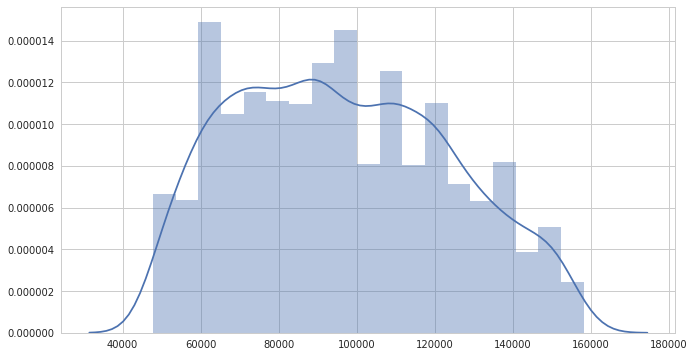

In [59]:
#Distruibuição do Salary
sns.distplot(pd.DataFrame(dataFinal[dataFinal["Salary"].isnull() == False]["Salary"]))


# Funções

In [60]:
def get_dummies_skills(X_column):
    #Criando uma lista de habilidades. Poderiamos fazer isso somente uma vez e guardar o array para o load ficar mais rapido
    skillsList = []
    for skills in X_all[X_column]:
        skillsSplit = skills.split(";")
        for skill in skillsSplit:
            skillsList.append(skill.strip())

    skillsList = set(skillsList)
    
    #Para cada column de skills, fazemos um dummie, já que são dimensões categorizadas
    for skill in skillsList: 
        column = []
        for skills in X_all[X_column]:
            skillsSplit = skills.split(";")
            skillsSplit = [x.strip(' ') for x in skillsSplit]
            if skill.strip() in skillsSplit:
                column.append(1)
            else:
                column.append(0)
        X_all[X_column + "_" + skill.strip()] =  column
    X_all.drop(X_column, axis=1, inplace=True)
    

    

In [61]:
def get_dummies_normal(X_collumn):
    dataDummies = X_all
    dataDummies = dataDummies.join(pd.get_dummies(X_all[X_collumn], prefix=X_collumn))
    dataDummies.drop(X_collumn, axis=1, inplace=True)
    return dataDummies


In [62]:
def get_dummies_skills_noise(X_column):
    #Criando uma lista de habilidades. Poderiamos fazer isso somente uma vez e guardar o array para o load ficar mais rapido
    skillsList = []
    for skills in X_all_noise[X_column]:
        skillsSplit = skills.split(";")
        for skill in skillsSplit:
            skillsList.append(skill.strip())

    skillsList = set(skillsList)
    
    #Para cada column de skills, fazemos um dummie, já que são dimensões categorizadas
    for skill in skillsList: 
        column = []
        for skills in X_all_noise[X_column]:
            skillsSplit = skills.split(";")
            skillsSplit = [x.strip(' ') for x in skillsSplit]
            if skill.strip() in skillsSplit:
                column.append(1)
            else:
                column.append(0)
        X_all_noise[X_column + "_" + skill.strip()] =  column
    X_all_noise.drop(X_column, axis=1, inplace=True)
    
    
def get_dummies_normal_noise(X_collumn):
    dataDummies = X_all_noise
    dataDummies = dataDummies.join(pd.get_dummies(X_all_noise[X_collumn], prefix=X_collumn))
    dataDummies.drop(X_collumn, axis=1, inplace=True)
    return dataDummies



In [63]:
def model(regr, X_train, X_test, y_train, y_test):
    
    # Treinando o modelo 
    startReg = time()
    regr.fit(X_train, y_train)
    endReg = time()
    print "Tempo de treino do modelo: {:.4f} segundos".format(endReg - startReg)

    
    #Fazendo a previsão do modelo de treino
    startPred = time()
    y_pred = regr.predict(X_train)
    endPred = time()
    # The mean squared error
    print("\nMean squared error (Treino): %.2f"
          % mean_squared_error(y_train, y_pred))
    # Explained variance score: 1 is perfect prediction
    print('R2 Score (Treino): %.2f' % r2_score(y_train, y_pred))
    print "Tempo de previsão do modelo de treino: {:.4f} segundos".format(endPred - startPred)

    
    
    
    #Fazendo a previsão do modelo
    startPred = time()
    y_pred = regr.predict(X_test)
    endPred = time()
    # The mean squared error
    print("\nMean squared error: %.2f"
          % mean_squared_error(y_test, y_pred))
    # Explained variance score: 1 is perfect prediction
    print('R2 Score: %.2f' % r2_score(y_test, y_pred))
    print "Tempo de previsão do modelo : {:.4f} segundos".format(endPred - startPred)

    
    endAll = time()

    print "\nTempo total da operação: {:.4f} segundos".format(endAll - startAll)
    

# Benchmark

In [64]:
startAll = time()


features = features_multiples + features_normal + features_int

columns = features + ["Salary"]

dataBench = dataFinal[columns]


#Quantidade total de usuarios do USA
print "Total de usuários : {}".format(len(dataBench))

for fNull in features_multiples + features_normal:
    dataBench[fNull] = dataBench[fNull].fillna("Has no opinion")


#Quantidade final    
dataBench = dataBench.dropna(how='any')


print "Total de usuários depois de retirar nulos: {}".format(len(dataBench))

X_all = dataBench[features]
y_all = dataBench["Salary"]


#Normalização
from sklearn import preprocessing
Y_all_origin = y_all
y_all = preprocessing.robust_scale(y_all.reshape(-1, 1))


#Fazendos os dummies
for feature_multiple in features_multiples:
    get_dummies_skills(feature_multiple)
    
for feature_normal in features_normal:
    X_all = get_dummies_normal(feature_normal)
    
    
print "Contém {} linhas com {} caracteristicas cada.".format(*X_all.shape)

    
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, train_size=0.7, random_state=42)


print "O conjunto de treinamento tem {} amostras.".format(X_train.shape[0])
print "O conjunto de teste tem {} amostras.".format(X_test.shape[0])


#Fazendo a regressão de benchmark
model(linear_model.BayesianRidge(), X_train, X_test, y_train, y_test)


y_mean=np.empty(len(y_all)).reshape(-1,1)
y_mean.fill(y_all.mean())

print("\nMean squared error with mean: %.2f"
          %mean_squared_error(y_all, y_mean))
print('R2 Score with mean: %.2f' % r2_score(y_all, y_mean))


Total de usuários : 3343


/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


Total de usuários depois de retirar nulos: 1386


/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:31: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


Contém 1386 linhas com 509 caracteristicas cada.
O conjunto de treinamento tem 970 amostras.
O conjunto de teste tem 416 amostras.
Tempo de treino do modelo: 0.4215 segundos

Mean squared error (Treino): 0.17
R2 Score (Treino): 0.59
Tempo de previsão do modelo de treino: 0.0020 segundos

Mean squared error: 0.25
R2 Score: 0.39
Tempo de previsão do modelo : 0.0008 segundos

Tempo total da operação: 5.8581 segundos

Mean squared error with mean: 0.41
R2 Score with mean: 0.00


# Pré-Processamento 

In [65]:
features_int = []


features = features_normal + features_multiples + features_int

columns = features + ["Salary"]

dataFinal = dataFinal[columns]


#Fazemos o replace de algumas features que contém dados nulos 

#dataFinal["MajorUndergrad"] = dataFinal["MajorUndergrad"].fillna("Has no graduation")
#dataFinal["HaveWorkedLanguage"] = dataFinal["HaveWorkedLanguage"].fillna("Has no skill")
#dataFinal["HaveWorkedDatabase"] = dataFinal["HaveWorkedDatabase"].fillna("Has no skill")
#dataFinal["HaveWorkedPlatform"] = dataFinal["HaveWorkedPlatform"].fillna("Has no skill")

for fNull in features_multiples + features_normal:
    dataFinal[fNull] = dataFinal[fNull].fillna("Has no opinion")

#Quantidade total de usuarios do USA
print "Total de usuários : {}".format(len(dataFinal))

#Descrevemos a quantidade de nulos em cada feature
#for feature in columns:
#    print "Categoria {} tem {} nulos".format(feature, len(dataFinal[dataFinal[feature].isnull() == True]))

#Quantidade final    
dataFinal = dataFinal.dropna(how='any')


print len(dataFinal)

X_all = dataFinal[features]
y_all = dataFinal["Salary"]

#Normalização
Y_all_origin = y_all
y_all = preprocessing.robust_scale(y_all.reshape(-1, 1))

#Fazendos os dummies
for feature_multiple in features_multiples:
    get_dummies_skills(feature_multiple)
    
for feature_normal in features_normal:
    X_all = get_dummies_normal(feature_normal)

Total de usuários : 3343
3343


/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:39: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


# Escolhendo melhor feature selection (Processamento demorado)

/usr/local/lib/python2.7/site-packages/sklearn/feature_selection/univariate_selection.py:279: RuntimeWarning: invalid value encountered in divide
  corr /= row_norms(X.T)
/usr/local/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/usr/local/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/usr/local/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


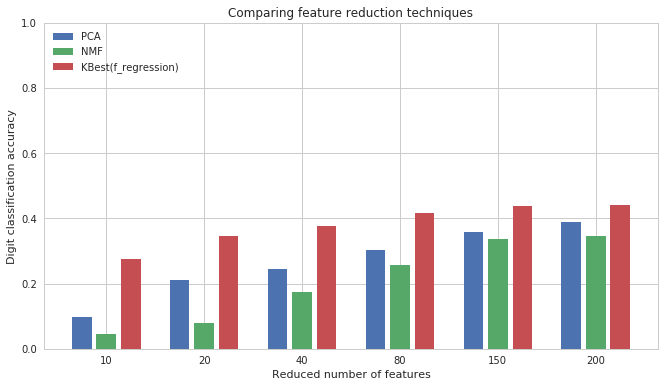

In [18]:


pipe = Pipeline([
    ('reduce_dim', PCA()),
    ('classify', linear_model.BayesianRidge())
])

N_FEATURES_OPTIONS = [10,20,40,80,150,200]
MAX_DEPTH = [1, 2, 3]
param_grid = [
    {
        'reduce_dim': [PCA(iterated_power=7), NMF()],
        'reduce_dim__n_components': N_FEATURES_OPTIONS,
    },
    {
        'reduce_dim': [SelectKBest(f_regression)],
        'reduce_dim__k': N_FEATURES_OPTIONS,
    }
]
reducer_labels = ['PCA', 'NMF', 'KBest(f_regression)']

grid = GridSearchCV(pipe, cv=3, n_jobs=1, param_grid=param_grid)
grid.fit(X_all, y_all)

mean_scores = np.array(grid.cv_results_['mean_test_score'])
# scores are in the order of param_grid iteration, which is alphabetical
mean_scores = mean_scores.reshape(1, -1, len(N_FEATURES_OPTIONS))
# select score for best C
mean_scores = mean_scores.max(axis=0)
bar_offsets = (np.arange(len(N_FEATURES_OPTIONS)) *
               (len(reducer_labels) + 1) + .5)

plt.figure()
COLORS = 'bgrcmyk'
for i, (label, reducer_scores) in enumerate(zip(reducer_labels, mean_scores)):
    plt.bar(bar_offsets + i, reducer_scores, label=label, color=COLORS[i])

plt.title("Comparing feature reduction techniques")
plt.xlabel('Reduced number of features')
plt.xticks(bar_offsets + len(reducer_labels) / 2, N_FEATURES_OPTIONS)
plt.ylabel('Digit classification accuracy')
plt.ylim((0, 1))
plt.legend(loc='upper left')

# Escolhendo a melhor regressão (Processamento demorado)

[  4.13722902e-01   4.21847891e-01   4.31150704e-01   4.31456483e-01
   4.16235523e-01   4.03346050e-01   3.90055154e-01   3.69538380e-01
  -2.31892405e+25  -2.43637800e+24   4.14689058e-01   4.25191491e-01
   4.38380394e-01   4.43131491e-01   4.34810262e-01   4.30278163e-01
   4.28896807e-01   4.24184575e-01   4.24300701e-01   4.21242655e-01
  -7.34900767e-04  -7.34900767e-04  -7.34900767e-04  -7.34900767e-04
  -7.34900767e-04  -7.34900767e-04  -7.34900767e-04  -7.34900767e-04
  -7.34900767e-04  -7.34900767e-04   3.70390433e-01   3.83817820e-01
   4.02551011e-01   4.11049737e-01   4.09238082e-01   4.09371986e-01
   4.10371579e-01   4.08611149e-01   4.10564840e-01   4.09300275e-01
  -7.34900767e-04  -7.34900767e-04  -7.34900767e-04  -7.34900767e-04
  -7.34900767e-04  -7.34900767e-04  -7.34900767e-04  -7.34900767e-04
  -7.34900767e-04  -7.34900767e-04   2.07895674e-01   2.08213180e-01
   2.07342161e-01   2.06736210e-01   2.06746527e-01   2.05674566e-01
   2.05318400e-01   2.05705315e-01

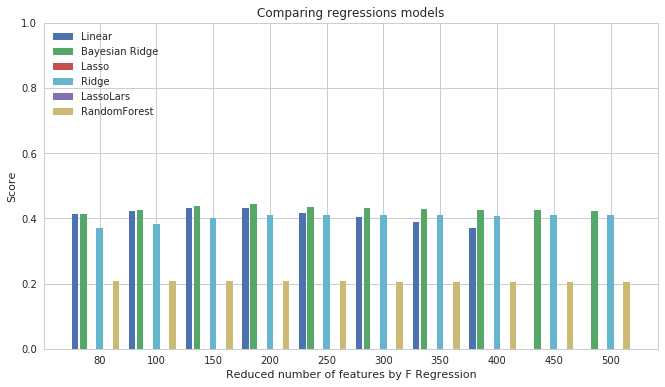

In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

pipe = Pipeline([
    ('reduce_dim', SelectKBest(f_regression)),
    ('classify', linear_model.LinearRegression(normalize=True))
])

#N_FEATURES_OPTIONS = [80]
N_FEATURES_OPTIONS = [80,100, 150, 200, 250, 300, 350, 400, 450, 500]

MAX_DEPTH = [1, 2, 3]
param_grid = [
 #   {
 #       'reduce_dim': [PCA(iterated_power=7), NMF()],
 #       'reduce_dim__n_components': N_FEATURES_OPTIONS,
 #       'classify__C': C_OPTIONS
 #   },
    {
        'reduce_dim': [SelectKBest(f_regression)],
        'reduce_dim__k': N_FEATURES_OPTIONS,
        'classify': [linear_model.LinearRegression(normalize=True), linear_model.BayesianRidge(normalize=True), linear_model.Lasso(normalize=True), linear_model.Ridge(normalize=True),linear_model.LassoLars(normalize=True), RandomForestRegressor(max_depth=3, random_state=42)]
        #'classify__max_depth': MAX_DEPTH
    },
]

reducer_labels = ['Linear', "Bayesian Ridge", "Lasso", "Ridge", "LassoLars", "RandomForest"]

grid = GridSearchCV(pipe, cv=3, n_jobs=1, param_grid=param_grid)
grid.fit(X_all, y_all)

mean_scores = np.array(grid.cv_results_['mean_test_score'])
print mean_scores
# scores are in the order of param_grid iteration, which is alphabetical
mean_scores = mean_scores.reshape(-1, len(N_FEATURES_OPTIONS))
# select score for best C
#mean_scores = mean_scores.max(axis=0)
bar_offsets = (np.arange(len(N_FEATURES_OPTIONS)) *
               (len(reducer_labels) + 1) + .5)

plt.figure()
COLORS = 'bgrcmyk'
for i, (label, reducer_scores) in enumerate(zip(reducer_labels, mean_scores)):
    plt.bar(bar_offsets + i, reducer_scores, label=label, color=COLORS[i])

plt.title("Comparing regressions models")
plt.xlabel('Reduced number of features by F Regression')
plt.xticks(bar_offsets + len(reducer_labels) / 2, N_FEATURES_OPTIONS)
plt.ylabel('Score')
plt.ylim((0, 1))
plt.legend(loc='upper left')

In [22]:
best_parameters, score, _ = max(grid.grid_scores_, key=lambda x: x[1])


for param_name in sorted(best_parameters.keys()):
        print("%s: %r" % (param_name, best_parameters[param_name]))

classify: BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=True, tol=0.001, verbose=False)
reduce_dim: SelectKBest(k=200, score_func=<function f_regression at 0x7fcb18acb7d0>)
reduce_dim__k: 200


/usr/local/lib/python2.7/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


# Implementação

In [66]:
featureSelection = SelectKBest(f_regression, k=200)
featureSelectionFit = featureSelection.fit(X_all, y_all)
np.set_printoptions(precision=3)
columnsSelection = featureSelectionFit.get_support()
X_all_selection = featureSelectionFit.transform(X_all)
scores = featureSelectionFit.scores_


In [67]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kf = KFold(n_splits=3, random_state=42)

for k, (train, test) in enumerate(kf.split(X_all_selection, y_all)):
    X_train = X_all_selection[train]
    X_test = X_all_selection[test]
    y_train = y_all[train]
    y_test = y_all[test]
    

#X_train, X_test, y_train, y_test = train_test_split(X_all_selection, y_all, train_size=0.7, random_state=42)

print "O conjunto de treinamento tem {} amostras.".format(X_train.shape[0])
print "O conjunto de teste tem {} amostras.".format(X_test.shape[0])


model(linear_model.BayesianRidge(), X_train , X_test, y_train, y_test)






O conjunto de treinamento tem 2229 amostras.
O conjunto de teste tem 1114 amostras.
Tempo de treino do modelo: 0.0920 segundos

Mean squared error (Treino): 0.19
R2 Score (Treino): 0.53
Tempo de previsão do modelo de treino: 0.0012 segundos

Mean squared error: 0.21
R2 Score: 0.45
Tempo de previsão do modelo : 0.0006 segundos

Tempo total da operação: 631.8342 segundos


# Escolhendo melhores params para o modelo (Processamento lento)

In [12]:
pipe = Pipeline([
    ('classify', linear_model.BayesianRidge(normalize=True))
])


alpha_1 = [1e-06, 3e-06, 6e-06]
alpha_2 = [1e-06, 3e-06, 6e-06]
tol = [1e-03, 3e-03, 6e-03]
fit_intercept = [True, False]
normalize = [True, False]
positive = [True, False]
max_iter = [100,300,500,800,1000]
lambda_1= [1e-06,6e-06, 7e-06,8e-06]
lambda_2= [1e-07, 1e-08, 1e-06]

param_grid = [
    {
        'classify__fit_intercept': fit_intercept,
        'classify__normalize': normalize,
        'classify__n_iter': max_iter,
    
    },
]

grid = GridSearchCV(pipe, cv=3, n_jobs=1, param_grid=param_grid)
grid.fit(X_all_selection, y_all)


GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(steps=[('classify', BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=True, tol=0.001, verbose=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'classify__normalize': [True, False], 'classify__fit_intercept': [True, False], 'classify__n_iter': [100, 300, 500, 800, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [13]:
best_parameters, score, _ = max(grid.grid_scores_, key=lambda x: x[1])

for param_name in sorted(best_parameters.keys()):
        print("%s: %r" % (param_name, best_parameters[param_name]))


classify__fit_intercept: True
classify__n_iter: 100
classify__normalize: True


/usr/local/lib/python2.7/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


In [44]:
regModel =  linear_model.BayesianRidge(normalize=True, n_iter=100, fit_intercept=True)
model(regModel, X_train, X_test, y_train, y_test)

Tempo de treino do modelo: 0.0980 segundos

Mean squared error (Treino): 0.18
R2 Score (Treino): 0.54
Tempo de previsão do modelo de treino: 0.0012 segundos

Mean squared error: 0.21
R2 Score: 0.45
Tempo de previsão do modelo : 0.0006 segundos

Tempo total da operação: 18.3991 segundos


# Testar a robustez 

In [68]:
dataNoise = data[(data["Country"] == "Brazil")]

#features_multiples + features_normal + features_int
new_features = [] # The list of your K best features

for bool, feature in zip(columnsSelection, X_all):
    if bool:
        new_features.append(feature)
        

dataBenchNoise = dataNoise[columns]


#Quantidade total de usuarios do USA
print "Total de usuários : {}".format(len(dataBenchNoise))

for fNull in features_multiples + features_normal:
    dataBenchNoise[fNull] = dataBenchNoise[fNull].fillna("Has no opinion")


#Quantidade final    
dataBenchNoise = dataBenchNoise.dropna(how='any')


print "Total de usuários depois de retirar nulos: {}".format(len(dataBenchNoise))

X_all_noise = dataBenchNoise[features]
y_all_noise = dataBenchNoise["Salary"]



#Fazendos os dummies
for feature_multiple in features_multiples:
    get_dummies_skills_noise(feature_multiple)
    
for feature_normal in features_normal:
    X_all_noise = get_dummies_normal_noise(feature_normal)




Total de usuários : 777


/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Total de usuários depois de retirar nulos: 237


In [69]:
X_all_noise["HaveWorkedLanguage_Hack"] = 0
X_all_noise["YearsProgram_18 to 19 years"] = 0
X_all_noise["YearsCodedJob_19 to 20 years"] = 0
X_all_noise["HaveWorkedLanguage_Smalltalk"] = 0
X_all_noise["HomeRemote_Has no opinion"] = 0

In [70]:

X_all_test_noise = pd.concat([X_all_noise[new_features], X_all[new_features]])
y_all_test_noise = pd.concat([y_all_noise, Y_all_origin])


y_all_test_noise = preprocessing.robust_scale(y_all_test_noise.reshape(-1, 1))


X_train_noise, X_test_noise, y_train_noise, y_test_noise = train_test_split(X_all_test_noise, y_all_test_noise, train_size=0.7, random_state=42)


print "O conjunto de treinamento tem {} amostras.".format(X_train.shape[0])
print "O conjunto de teste tem {} amostras.".format(X_test.shape[0])


model(regModel, X_train_noise, X_test_noise, y_train_noise, y_test_noise)

O conjunto de treinamento tem 2229 amostras.
O conjunto de teste tem 1114 amostras.
Tempo de treino do modelo: 0.1031 segundos

Mean squared error (Treino): 0.27
R2 Score (Treino): 0.50
Tempo de previsão do modelo de treino: 0.0023 segundos

Mean squared error: 0.31
R2 Score: 0.42
Tempo de previsão do modelo : 0.0012 segundos

Tempo total da operação: 1030.2631 segundos


/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:6: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


In [71]:
scoresFeatures = dict(zip(X_all.columns, scores))

from operator import itemgetter
import operator as op
sorted(scoresFeatures.items(), key=itemgetter(1))[-10:]

[("FormalEducation_Bachelor's degree", 76.607599529736106),
 ('CompanyType_Venture-funded startup', 86.365680922340886),
 ('YearsProgram_4 to 5 years', 96.902877450015438),
 ("FormalEducation_Master's degree", 103.42799960666294),
 ('YearsCodedJob_Less than a year', 108.44276839251502),
 ('CompanyType_Publicly-traded corporation', 126.89719778068633),
 ('YearsCodedJob_2 to 3 years', 150.45815352054461),
 ('YearsCodedJob_1 to 2 years', 180.38506594294711),
 ('YearsCodedJob_20 or more years', 202.93881704219973),
 ('YearsProgram_20 or more years', 400.64471156615343)]

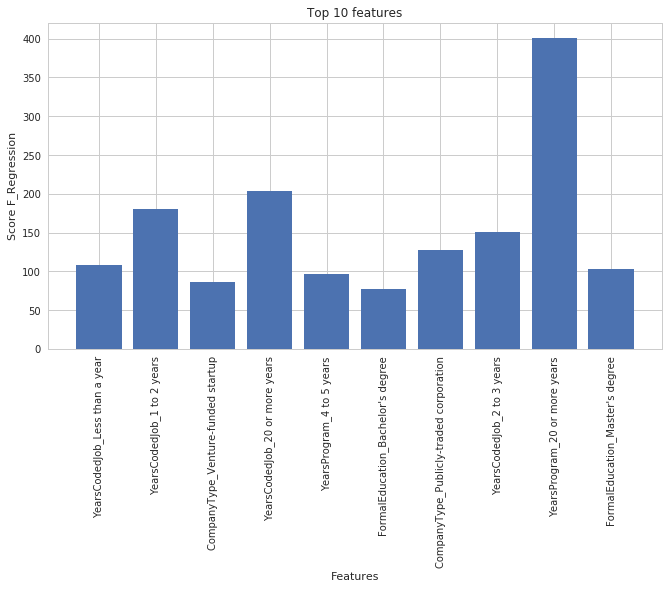

In [72]:
sortedFeatures = sorted(scoresFeatures.items(), key=itemgetter(1))[-10:]
sortedFeaturesDict = dict(sortedFeatures)

x = np.arange(len(sortedFeaturesDict))
y = sortedFeaturesDict.values()

plt.bar(x, y)
plt.title("Top 10 features")
plt.xlabel('Features')
plt.ylabel('Score F_Regression')
plt.xticks(x, sortedFeaturesDict.keys(), rotation='vertical')
plt.show()

In [ ]:
sortedFeaturesDict.keys()